# AIPI 590 - xAI | Assignment #02

## Interpretable Machine Learning

### Shaila Güereca

https://colab.research.google.com/github/shailajgg/AIPI590_Explainable_AI/blob/main/Interpretable_ML/Interpretable_ML_notebook.ipynb

# Telco Customer Churn Analysis  

This repository contains the code and analysis for understanding and predicting customer churn using a dataset from a telecommunications company. The dataset can be found [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code). The goal is to identify factors contributing to churn and build interpretable models to predict customers at risk of leaving the company.  

## Instructions  

This project involves the following tasks:  

### 1. **Exploratory Data Analysis (EDA) to Check Assumptions**  
- Perform exploratory analysis of the dataset to examine relationships between features and the target variable (churn).  
- Use appropriate visualizations and statistical methods to assess whether assumptions for linear regression, logistic regression, and Generalized Additive Models (GAM) are met.  

### 2. **Linear Regression**  
- Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning).  
- Build a linear regression model to predict churn.  
- Interpret the coefficients and evaluate the model's performance.  

### 3. **Logistic Regression**  
- Treat churn as a binary variable.  
- Build a logistic regression model to predict the probability of churn.  
- Interpret the coefficients.  

### 4. **Generalized Additive Model (GAM)**  
- Build a GAM to model non-linear relationships between customer features and churn.  
- Interpret the results of the GAM model.  

### 5. **Model Comparison**  
- Compare the performance and interpretability of the linear regression, logistic regression, and GAM models.  
- Discuss the strengths and weaknesses of each approach.  
- Provide recommendations on which model(s) the telecommunications company should use to address their customer churn problem.  



In [26]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data
!rm -rf AIPI590_Explainable_AI

# Clone GitHub files to colab workspace
repo_name = "AIPI590_Explainable_AI" # Change to your repo name
git_path = 'https://github.com/AIPI590_Explainable_AI/Interpretable_ML/Interpretable_ML_notebook.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = "/content/AIPI590_Explainable_AI"
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

# print cwd
print(os.getcwd())
print(path_to_notebook)


rm: ./sample_data: No such file or directory
Cloning into 'Interpretable_ML_notebook'...
remote: Not Found
fatal: repository 'https://github.com/AIPI590_Explainable_AI/Interpretable_ML/Interpretable_ML_notebook.git/' not found
[Errno 2] No such file or directory: '/content/AIPI590_Explainable_AI'
/Users/shailaguereca/Documents/AIPI 590 Explainable AI/AIPI590_Explainable_AI/Interpretable_ML
Instructions.md                       WA_Fn-UseC_-Telco-Customer-Churn.csv
Interpretable_ML_notebook.ipynb
/Users/shailaguereca/Documents/AIPI 590 Explainable AI/AIPI590_Explainable_AI/Interpretable_ML
/content/AIPI590_Explainable_AI


In [27]:
# Loading the required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pygam import LogisticGAM, s, f

import warnings

warnings.filterwarnings("ignore")

In [28]:
# Importing the dataset for the same folder as this notebook
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Displaying the first 5 rows of the dataset
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# According with the information of the dataset in Kaggle: 

The data set includes information about:

-Customers who left within the last month – the column is called Churn

-Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

-Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

-Demographic info about customers – gender, age range, and if they have partners and dependents

First we will check what columns are in the dataset and what type of data they contain

In [29]:
# First let's check the names of each column
data.columns
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [30]:
# Let's check the name of each column and the unique values in each column
for col in data.columns:
    print(col)
    print(data[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [31]:
# We can see that the column "TotalCharges" is a number with '' symbols but we can to treat it has numerical , let's convert it to numeric
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [32]:
# Check the type of each column
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## According to the codebook of the dataset each column represents the following:

### Location
- **CustomerID**: A unique ID that identifies each customer.

### Demographics
- **Gender**: The customer’s gender (Male, Female).
- **Senior Citizen**: Indicates if the customer is 65 or older (Yes, No).
- **Partner**: Whether the customer has a partner (Yes, No).
- **Dependents**: Indicates if the customer lives with any dependents, such as children, parents, or grandparents (Yes, No).

### Services
- **Tenure**: Number of months the customer has stayed with the company.
- **Phone Service**: Indicates if the customer subscribes to home phone service (Yes, No).
- **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines:(Yes, No, No phone service.)
- **InternetService**: Customer’s internet service provider:(DSL, Fiber optic,No internet service.)
- **OnlineSecurity**: Whether the customer has online security (Yes, No, No internet service).
- **Online Backup**: Indicates if the customer subscribes to an additional online backup service (Yes, No, No internet service).
- **DeviceProtection**: Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their internet equipment (Yes, No, No internet service).
- **TechSupport**: Indicates if the customer subscribes to an additional technical support plan with reduced wait times (Yes, No, No internet service).
- **StreamingTV**: Indicates if the customer uses their internet service to stream television programming from a third-party provider: (Yes, No, No internet service.)
- **StreamingMovies**: Indicates if the customer uses their internet service to stream movies from a third-party provider (Yes, No, No internet service).
- **Contract**: The customer’s current contract type:(Month-to-Month, One Year,Two Year.)
- **PaperlessBilling**: Indicates if the customer has chosen paperless billing (Yes, No).
- **PaymentMethod**: Indicates how the customer pays their bill:(Electronic check, Mailed check, Bank transfer (automatic),Credit card (automatic)).
- **MonthlyCharges**: The customer’s current total monthly charge for all their services (Number in $).
- **TotalCharges**: The customer’s total charges.

### Status
- **Churn**: Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. 

Source: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [33]:
# Check if we have any missing values in the dataset
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
# Show those rows with missing values
data[data["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We have 11 missing values in the TotalCharges column, but the other data is complete. We will drop the rows with missing values.

In [35]:
# Drop the rows with missing values
data.dropna(inplace=True)

# Exploratory Data Analysis
We will start by checking the mean, median, and standard deviation of the numerical variables in the dataset. For the categorical variables, we will check the frequency of each category.

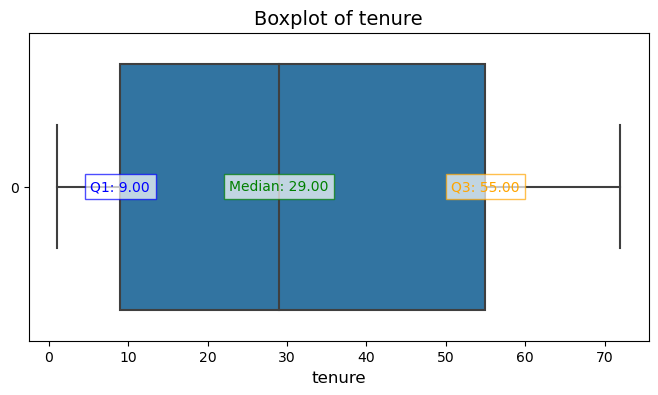

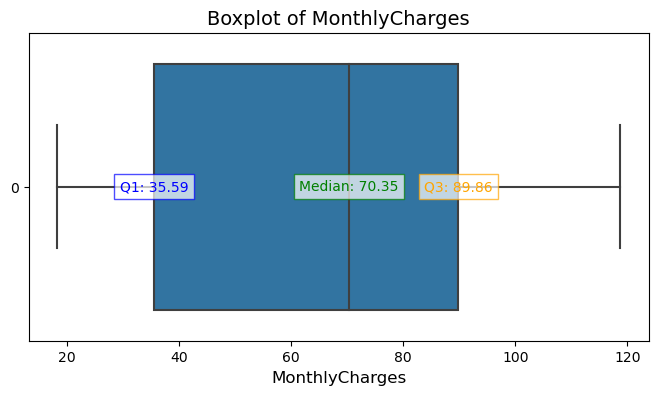

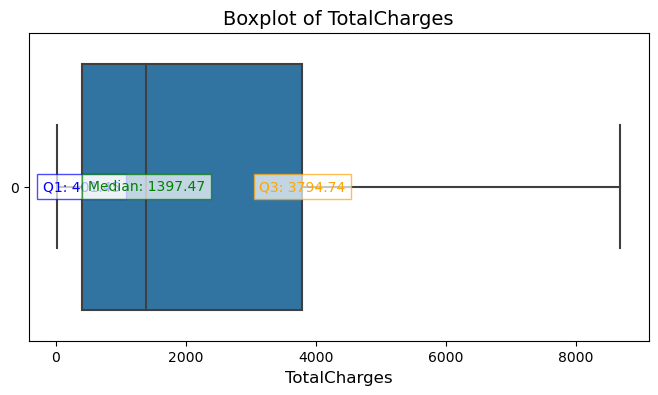

In [36]:
numerical_cols = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges",
]  # Update with your numerical columns

# Box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))

    # Create the box plot
    sns.boxplot(data=data[col], orient="h")
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

    # Calculate quantiles
    Q1 = data[col].quantile(0.25)
    Q2 = data[col].median()
    Q3 = data[col].quantile(0.75)

    # Add quantile labels inside the plot
    plt.text(
        Q1,
        0,
        f"Q1: {Q1:.2f}",
        ha="center",
        va="center",
        color="blue",
        fontsize=10,
        bbox=dict(facecolor="white", edgecolor="blue", alpha=0.7),
    )
    plt.text(
        Q2,
        0,
        f"Median: {Q2:.2f}",
        ha="center",
        va="center",
        color="green",
        fontsize=10,
        bbox=dict(facecolor="white", edgecolor="green", alpha=0.7),
    )
    plt.text(
        Q3,
        0,
        f"Q3: {Q3:.2f}",
        ha="center",
        va="center",
        color="orange",
        fontsize=10,
        bbox=dict(facecolor="white", edgecolor="orange", alpha=0.7),
    )

    # Show the plot
    plt.show()

Now lets check the distribution for all the categorial variables

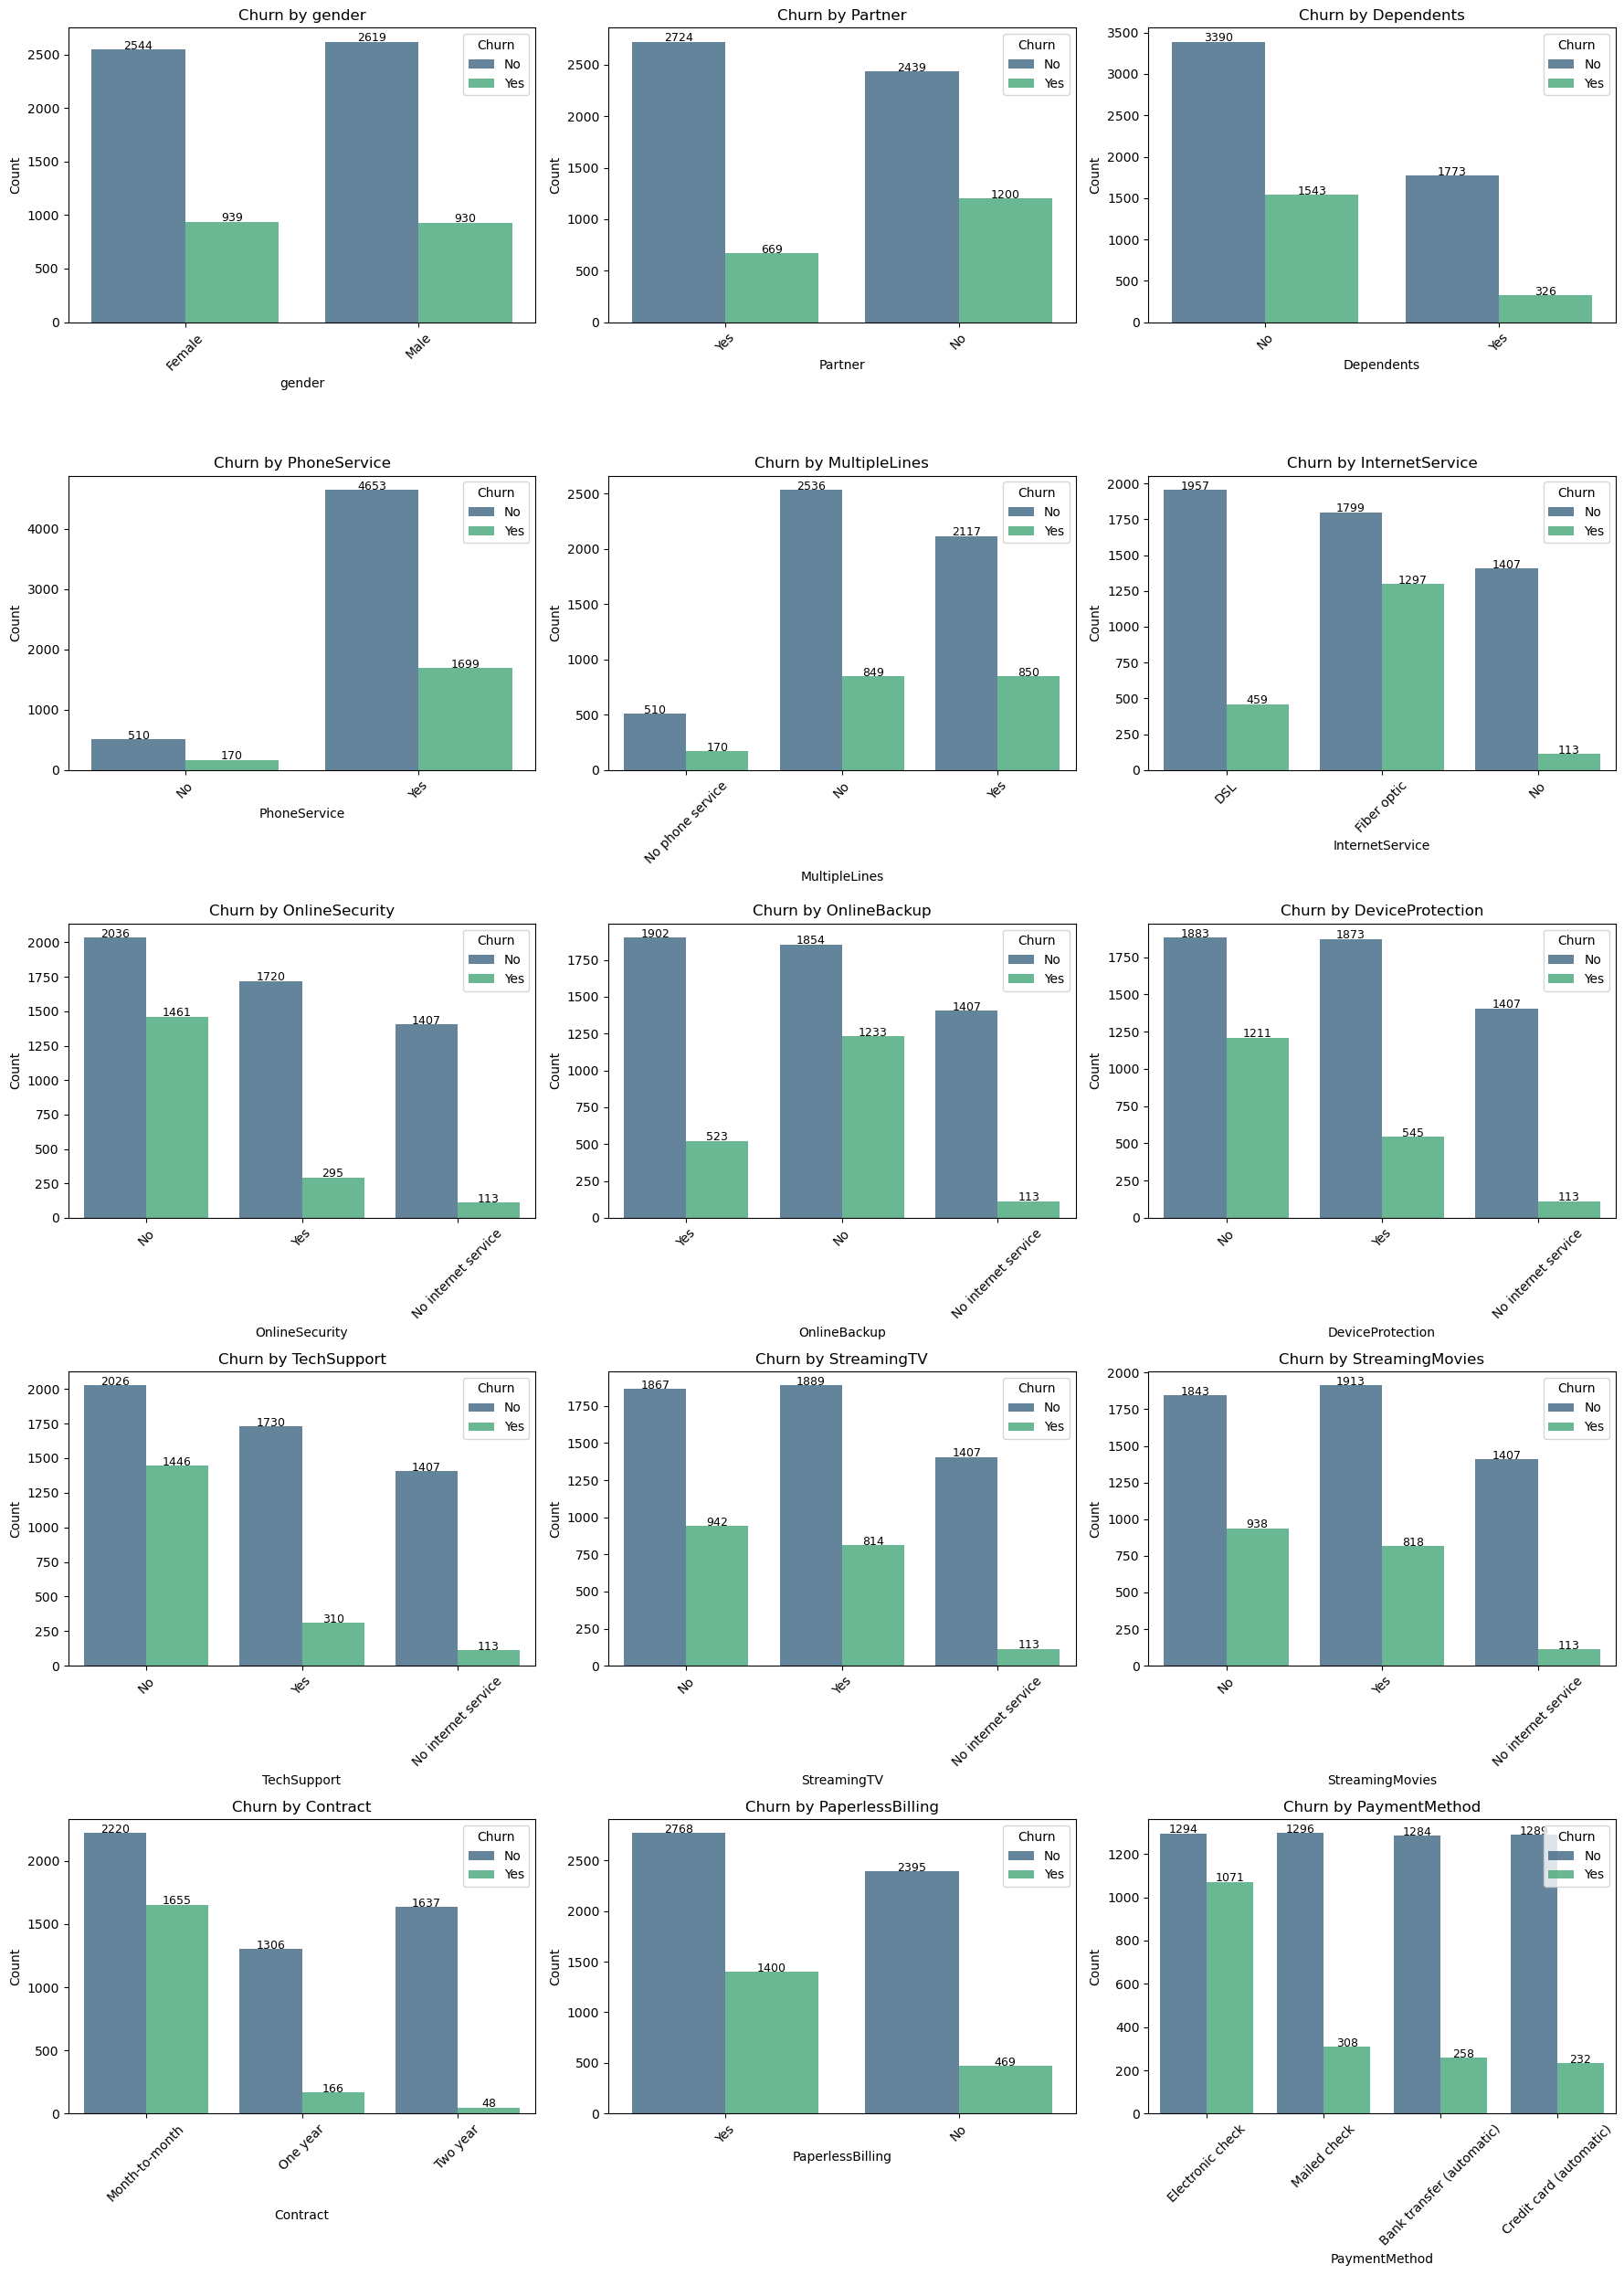

In [37]:
categorical_cols = [
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]

# Determine grid size
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(len(categorical_cols) / n_cols)  # Number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each categorical column with respect to Churn
for i, col in enumerate(categorical_cols):
    ax = axes[i]

    # Create a bar plot
    sns.countplot(data=data, x=col, hue="Churn", ax=ax, palette="viridis", alpha=0.8)

    # Add percentages above the bars
    total_counts = data[col].value_counts()  # Get total counts per category
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Annotate only if there is a non-zero value
            ax.annotate(
                f"{height:.0f}",
                (p.get_x() + p.get_width() / 2, height + 2),
                ha="center",
                fontsize=9,
                color="black",
            )

    # Add titles and adjust labels
    ax.set_title(f"Churn by {col}", fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis="x", rotation=45)
    ax.legend(title="Churn", loc="upper right")

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

## Linear Regression

We will treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn.

In [38]:
data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})

# Define categorical and numerical columns
cat_cols = [
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
num_cols = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

# Getting dummy variables from categorical columns
df_dummies = pd.get_dummies(data[cat_cols], drop_first=True).astype(int)

# Ensure numeric columns remain numeric
data_linear = pd.concat([data[num_cols], df_dummies], axis=1)

# Define the features and target
X = data_linear
y = data["Churn"]

# Adding a constant to the model and fitting it
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     120.9
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:09:12   Log-Likelihood:                -3057.9
No. Observations:                7032   AIC:                             6164.
Df Residuals:                    7008   BIC:                             6328.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

# Linear Regression: Interpret the coefficients


When analyzing the coefficients, it is worth focusing on those with a p-value lower than 0.05. In this case, the most significant variables are:

	•	Tenure
	•	Total Charges
	•	Multiple Lines (No Phone Service)
	•	Contract (One Year)
	•	Contract (Two Year)
	•	Paperless Billing (Yes)
	•	Payment Method (Electronic Check)

Among these, the variable with the highest coefficient is Multiple Lines = No Phone Service, with a value of 0.1341. This suggests that customers who do not have a phone line are 13.4 times more likely to churn compared to those who do have a phone line, assuming all other factors remain constant. This could indicate that a phone line is one of the most essential products for customer retention.

It is important to note that linear regression is typically designed for continuous variables, not binary variables like the one used in this case (Churn).

# Linear Regression: Model performance

To assess how well our Linear Regression model performs, we can look at the R-squared value, which is 28.4.

R-squared represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. In other words, it indicates how well the model fits the data. An R-squared value of 28.4% means that 28.4% of the variability in the target variable (Churn) is explained by the predictors (independent variables) in the model, while the remaining 71.6% of the variance is due to other factors not included in the model.

While this suggests that the model captures a portion of the relationship between the predictors and the target, there is still a significant amount of unexplained variation. Therefore, the model may not be the most accurate.

# Linear Regression: Assumptions

We need to check the following assumptions for our linear regression model:
1. Linearity 
2. Independence of observations 
3. Homoscedasticity
4. Normality
5. No multicollinearity 
6. No autocorrelation
7. No endogeneity

## 1. Linearity
Linearity assumes that the relationship between the independent variables and the dependent variable is linear.

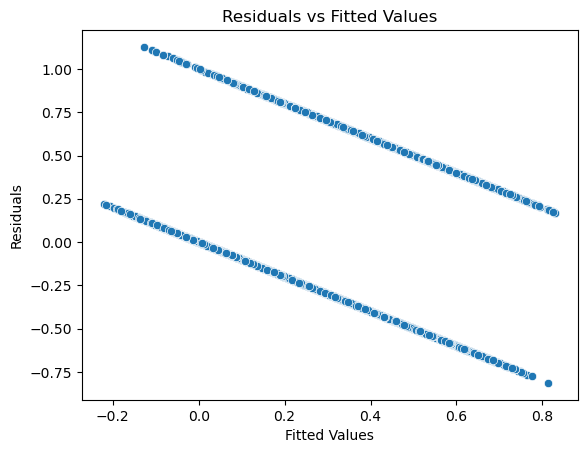

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Plotting residuals vs predicted values to check linearity
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# 2. Independence of observations 
This assumption checks whether the residuals are independent. We can verify it with the Durbin-Watson test for autocorrelation.

In [40]:
# Durbin-Watson test for independence (autocorrelation check)
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 2.004347318931744


The value of 2 in the Durbin-Watson test indicates that there is no autocorrelation in the residuals.

# 3. Homoscedasticity
Homoscedasticity assumes that the variance of residuals is constant across all levels of the independent variables. We can check this assumption visually by plotting residuals against fitted values.

In this case, we can revisit the Linearity plot to observe that the error term (i.e., the “noise” or random disturbance in the relationship between the independent and dependent variables) is not consistent across all values of the independent variable. We can see that it appears to have a negative slope as we approach a Churn Rate of 1.


# 4. Normality
We can check the Normality of residuals with a histogram or a Q-Q plot.

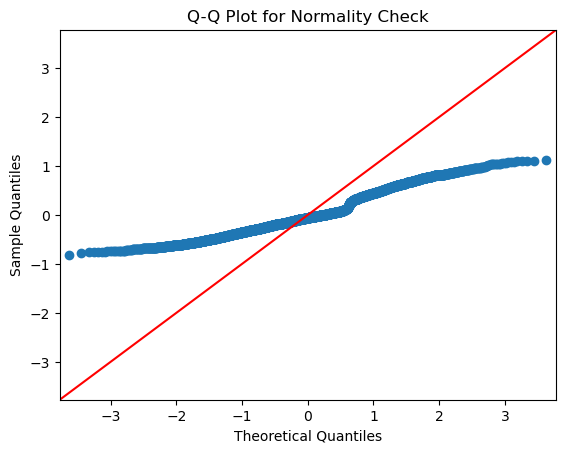

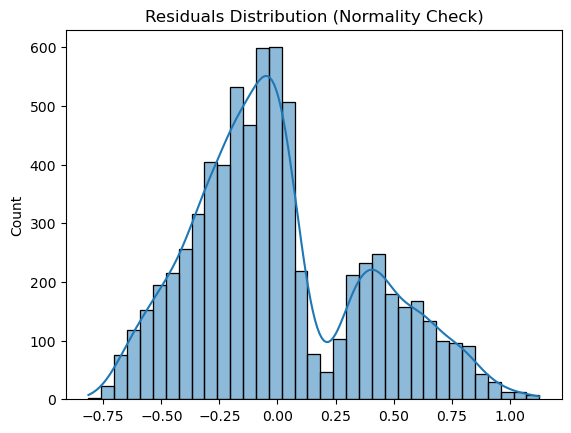

In [41]:
# Q-Q plot to check normality of residuals
sm.qqplot(model.resid, line="45")
plt.title("Q-Q Plot for Normality Check")
plt.show()

# Histogram of residuals
sns.histplot(model.resid, kde=True)
plt.title("Residuals Distribution (Normality Check)")
plt.show()

In the case of normality, a good QQ plot should show minimal deviations from the reference line, indicating that the residuals are approximately normally distributed. However, in this case, we observe the opposite—our residuals significantly deviate from the straight line we would expect.

The same issue is reflected in the histogram. Ideally, we would expect to see a symmetric, bell-shaped distribution, but here, it seems we have two distinct bimodal distributions on the same plot.

Based on this, we can conclude that the normality assumption is violated for our linear regression model.

# 5. No multicollinearity 
Multicollinearity occurs when independent variables are highly correlated with each other. We can check for multicollinearity using Variance Inflation Factor (VIF).

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_with_const = sm.add_constant(X)  # X is the independent variables matrix
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_with_const.values, i)
    for i in range(X_with_const.shape[1])
]
print(vif_data)

                                  feature         VIF
0                                   const    0.000000
1                           SeniorCitizen    1.153220
2                                  tenure    7.584453
3                          MonthlyCharges  866.089640
4                            TotalCharges   10.811490
5                             gender_Male    1.002106
6                             Partner_Yes    1.462988
7                          Dependents_Yes    1.381598
8                        PhoneService_Yes         inf
9          MultipleLines_No phone service         inf
10                      MultipleLines_Yes    7.289761
11            InternetService_Fiber optic  148.500814
12                     InternetService_No         inf
13     OnlineSecurity_No internet service         inf
14                     OnlineSecurity_Yes    6.338349
15       OnlineBackup_No internet service         inf
16                       OnlineBackup_Yes    6.796678
17   DeviceProtection_No int

In this case, we can observe correlation between our variables because several values exceed 1. For instance, Monthly Charges has a VIF of 866, which indicates serious multicollinearity. Additionally, we find other variables such as Internet Service = Fiber optic, Streaming TV = Yes, Streaming Movies = Yes, among many others, also exhibiting high VIF values.

In conclusion, the multicollinearity assumption is violated in this regression model.

## Logistic Regression

Logistic regression estimates the probability of an event occurring, such as Churn and not Churn, based on a given data set of independent variables.

This model is used for classification. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds.

Accuracy: 0.7882018479033405
Confusion Matrix:
[[915 118]
 [180 194]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



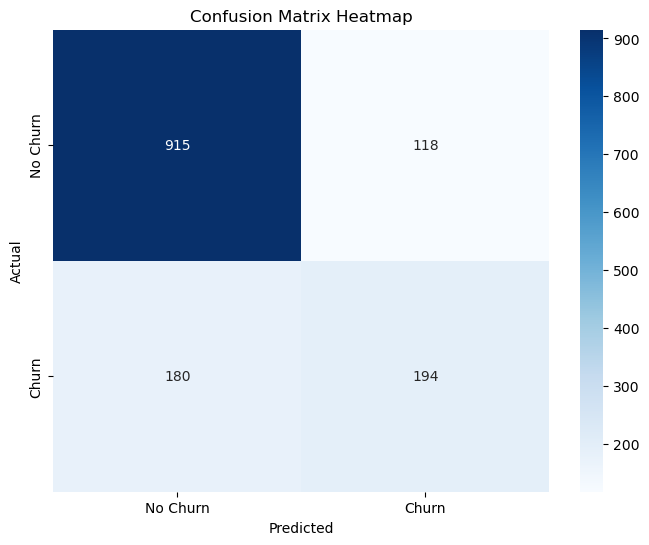

In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

With this logistic regression the model correctly predicts churn or non-churn for approximately 78.8% of the cases.

In terms of the performance of the model: 

Class 0 (Non-Churn):

    Precision (0.84): Of all the customers predicted to not churn, 84% were correctly classified.

    Recall (0.89): Of all the customers who actually did not churn, the model correctly identified 89%.

Class 1 (Churn):

    Precision (0.62): Of all the customers predicted to churn, only 62% were correctly classified. This suggests the model has a moderate rate of false positives.

    Recall (0.52): Of all the customers who actually churned, the model correctly identified only 52%. This indicates that the model struggles to identify churners effectively.


# Logistic Regression: Interpret the coefficients


In [44]:
# Get the coefficients of the logistic regression model
coefficients = pd.DataFrame(
    {"Feature": X_train.columns, "Coefficient": log_reg.coef_[0]}
)

Logistic regression coefficients aren’t as easily interpreted. This is because logistic regression uses the logit link function to “bend” our line of best fit and convert our classification problem into a regression problem.

Because of the logit function, logistic regression coefficients represent the log odds that an observation is in the target class (“Churn”) given the values of its X variables. Thus, these log odd coefficients need to be converted to regular odds in order to make sense of them.

In [45]:
# Exponentiate the coefficients to get the odds ratios
coefficients["Odds Ratio"] = np.exp(coefficients["Coefficient"])

print(coefficients)

                                  Feature  Coefficient  Odds Ratio
0                                   const    -0.133903    0.874675
1                           SeniorCitizen     0.267395    1.306556
2                                  tenure    -0.062180    0.939713
3                          MonthlyCharges     0.005876    1.005893
4                            TotalCharges     0.000338    1.000338
5                             gender_Male    -0.027137    0.973228
6                             Partner_Yes     0.057231    1.058900
7                          Dependents_Yes    -0.213058    0.808109
8                        PhoneService_Yes    -0.434846    0.647364
9          MultipleLines_No phone service     0.300943    1.351133
10                      MultipleLines_Yes     0.190305    1.209619
11            InternetService_Fiber optic     0.621676    1.862046
12                     InternetService_No    -0.082443    0.920864
13     OnlineSecurity_No internet service    -0.082443    0.92

With this features one of the most important variables in Multiple Lines = No phone services with and Odds Ratio of 1.35, meaning that for every Multiple Lines = No phone service, the odds that the observation is in Churn are 1.35 times as large as the odds that the observation is not in Churn when all other variables are held constant.

# Logistic Regression: Assumptions
We need to check the following assumptions for our linear regression model:
1. Linearity 
2. Independence of observations 
3. No multicollinearity 
4. Large sample size

## 1. Linearity

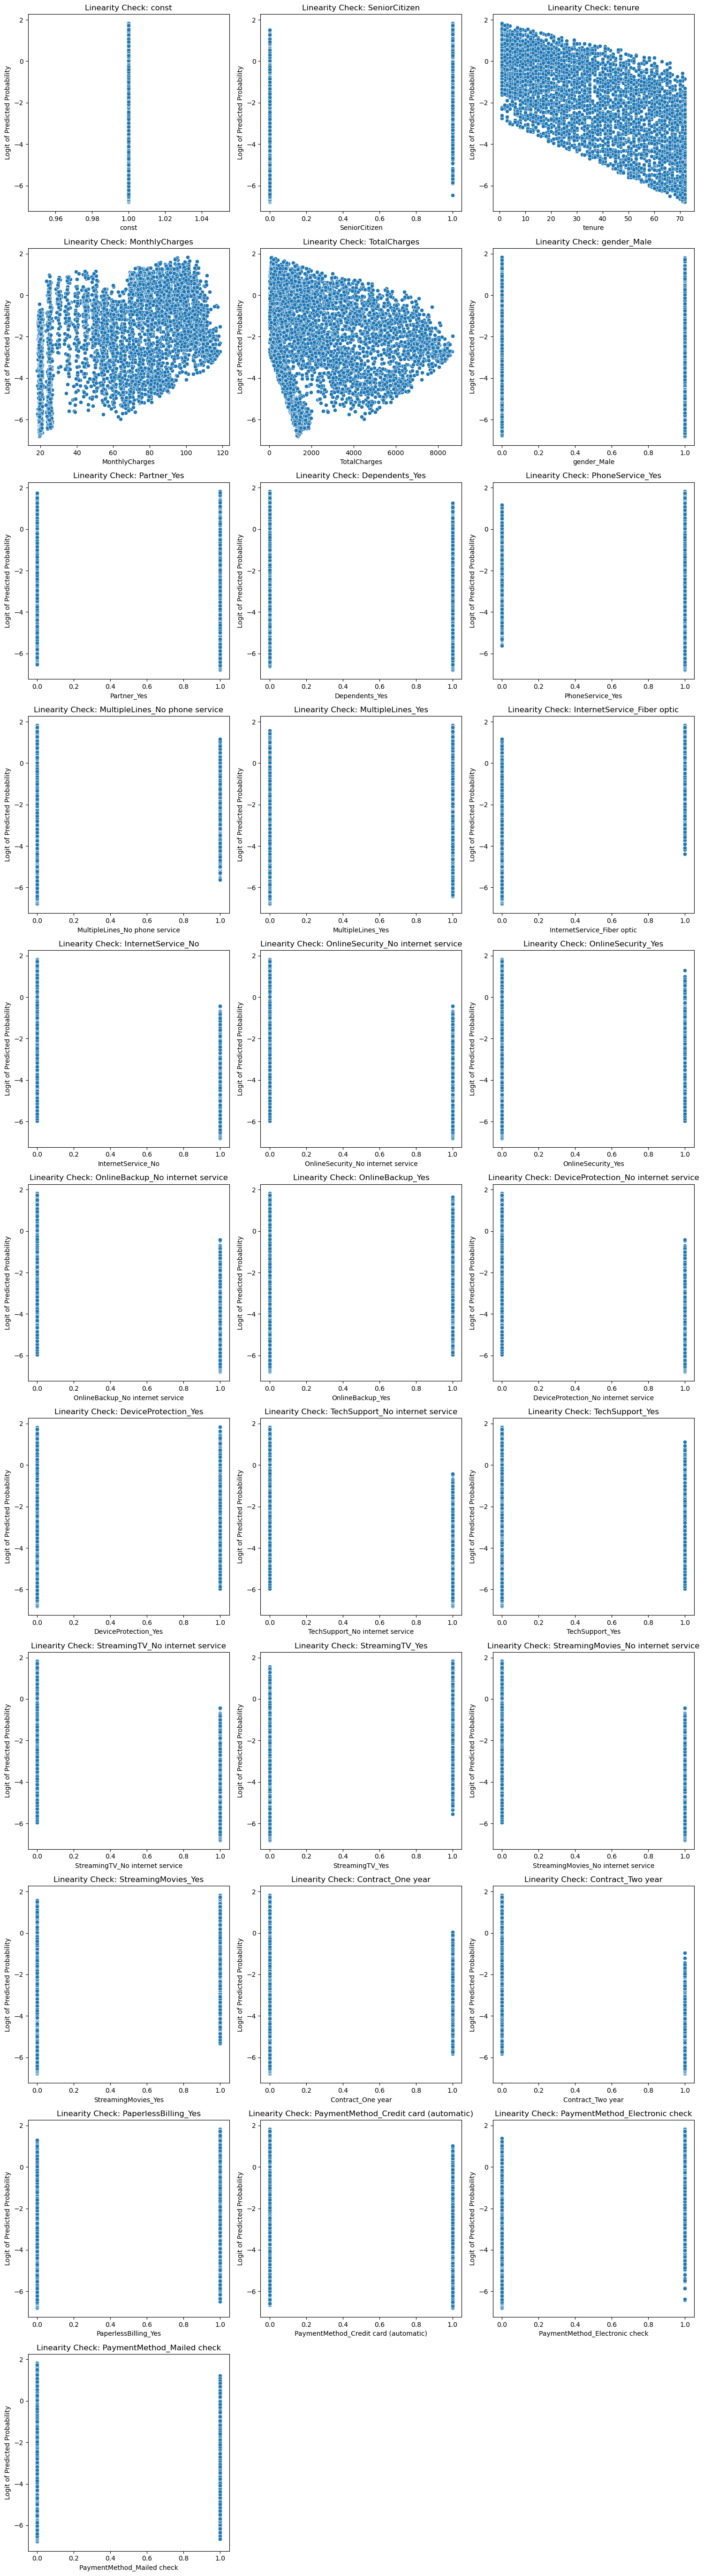

In [46]:
# Calculate the predicted probabilities
pred_probs = log_reg.predict_proba(X_train)[:, 1]

# Calculate the logit of the predicted probabilities
logit_pred_probs = np.log(pred_probs / (1 - pred_probs))

# Number of columns for the grid
n_cols = 3
n_rows = int(np.ceil(len(X_train.columns) / n_cols))

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plot the logit of the predicted probabilities against each predictor
for i, column in enumerate(X_train.columns):
    sns.scatterplot(x=X_train[column], y=logit_pred_probs, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Logit of Predicted Probability")
    axes[i].set_title(f"Linearity Check: {column}")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

For binary variables, it is challenging to determine linearity since they only take two distinct values. However, for continuous variables such as Monthly Charges and Total Charges, we do not observe a clear linear relationship between the logit of the outcome and these predictor variables. The only variable that does appear to satisfy the linearity assumption in this case is Tenure.

## 2. Independence of observations 

In [47]:
# Calculate the Durbin-Watson statistic
dw_stat = durbin_watson(log_reg.predict(X_train) - y_train)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 2.00464252553389


The Durbin-Watson (DW) statistic is a measure used to detect the presence of autocorrelation (a relationship between values separated from each other by a given time lag) in the residuals of a regression analysis. The value of the DW statistic ranges from 0 to 4, where:

	•	2 indicates no autocorrelation.
	•	0 to <2 indicates positive autocorrelation.
	•	>2 to 4 indicates negative autocorrelation.

In this case, the DW statistic is approximately 2.0046, which is very close to 2. This suggests that there is no significant autocorrelation in the residuals of this logistic model.

## 3. No multicollinearity 

In [48]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])
]

print(vif_data)

                                  Feature         VIF
0                                   const    0.000000
1                           SeniorCitizen    1.152756
2                                  tenure    7.475610
3                          MonthlyCharges  875.944051
4                            TotalCharges   10.667213
5                             gender_Male    1.003803
6                             Partner_Yes    1.470155
7                          Dependents_Yes    1.386296
8                        PhoneService_Yes         inf
9          MultipleLines_No phone service         inf
10                      MultipleLines_Yes    7.316372
11            InternetService_Fiber optic  149.302028
12                     InternetService_No         inf
13     OnlineSecurity_No internet service         inf
14                     OnlineSecurity_Yes    6.382090
15       OnlineBackup_No internet service         inf
16                       OnlineBackup_Yes    6.876888
17   DeviceProtection_No int

To evaluate no multicollinearity, we examine the Variance Inflation Factor (VIF) values.

	•	General rule of thumb for VIF:
	•	VIF = 1 to 5: Low multicollinearity (acceptable).
	•	VIF > 5: Moderate to high multicollinearity (requires investigation).
	•	VIF > 10: Severe multicollinearity (serious concern).
	•	VIF = infinity (inf): Perfect multicollinearity, indicating redundancy between variables.

Observations:
	Severe multicollinearity issues:

	•	MonthlyCharges: VIF = 875.94 (very high multicollinearity).
	•	InternetService_Fiber optic: VIF = 149.30 (severe multicollinearity).
	•	Tenure: VIF = 7.47 (moderate multicollinearity).
	•	TotalCharges: VIF = 10.67 (borderline severe multicollinearity).

The assumption of no multicollinearity is violated in this logistic model.

## 6. Large sample size

In [49]:
# Data size
n = len(X_train)
print(f"Number of observations: {n}")

Number of observations: 5625


We have a decent sample size for this logistic regression and the stability of the coefficients.

## Generalized Additive Model (GAM)

GAMs assume that the outcome can be modeled by a sum of arbitrary functions of each feature

GAMs use B splines, which allow us to automatically model non-linear relationships

GAM is still a sum of feature effects, but it gives the option to allow nonlinear relationships between some features and the output

LinearGAM: uses a Normal (Gaussian) error distribution
s(i): Represents a spline term for the ith feature, allowing for flexible, non-linear relationships between the feature and the response variable

In [ ]:
from pygam import LinearGAM, s
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize GAM with smoothing splines for each feature
gam = LinearGAM(
    s(0)
    + s(1)
    + s(2)
    + s(3)
    + s(4)
    + s(5)
    + s(6)
    + s(7)
    + s(8)
    + s(9)
    + s(10)
    + s(11)
    + s(12)
    + s(13)
    + s(14)
    + s(15)
    + s(16)
    + s(17)
    + s(18)
    + s(19)
    + s(20)
    + s(21)
    + s(22)
    + s(23)
    + s(24)
    + s(25)
    + s(26)
    + s(27)
    + s(28)
    + s(29)
)

# Find best smoothing parameters for each spline term
gam.gridsearch(X_train_scaled, y_train)

# Fit the model
gam.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gam = gam.predict(X_test_scaled)

# Calculate MSE and R^2
mse_gam = mean_squared_error(y_test, y_pred_gam)
r2_gam = r2_score(y_test, y_pred_gam)

print(f"GAM MSE: {mse_gam:.4f}, R^2: {r2_gam:.4f}")

# Summarize the model
gam.summary()

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:15
 18% (2 of 11) |####                     | Elapsed Time: 0:00:02 ETA:   0:00:13
 27% (3 of 11) |######                   | Elapsed Time: 0:00:04 ETA:   0:00:11
 36% (4 of 11) |#########                | Elapsed Time: 0:00:05 ETA:   0:00:09
 45% (5 of 11) |###########              | Elapsed Time: 0:00:06 ETA:   0:00:07
 54% (6 of 11) |#############            | Elapsed Time: 0:00:08 ETA:   0:00:06
 63% (7 of 11) |###############          | Elapsed Time: 0:00:09 ETA:   0:00:05
 72% (8 of 11) |##################       | Elapsed Time: 0:00:10 ETA:   0:00:03
 81% (9 of 11) |####################     | Elapsed Time: 0:00:11 ETA:   0:00:02
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:13 ETA:   0:00:01
100% (11 of 11) |########################| Elapsed Time: 0:00:15 Time:  0:00:15


GAM MSE: 0.1411, R^2: 0.2771
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     42.1422
Link Function:                     IdentityLink Log Likelihood:                                -14728.0785
Number of Samples:                         5625 AIC:                                            29542.4415
                                                AICc:                                           29543.1239
                                                GCV:                                                0.1355
                                                Scale:                                              0.1337
                                                Pseudo R-Squared:                                   0.3199
Feature 

In this case we will be using Pseudo R-Squared to see how the model performs. The Pseudo R-Squared is a measure of how well the model explains the variability in the outcome (dependent variable). A Pseudo R-Squared value of 0.3199 means that approximately 31.99% of the variation in the dependent variable (churn) is explained by the predictors in the GAM model.

For this model, many of the coefficients turned out to be significant when considering significance levels below an alpha of 0.05. 

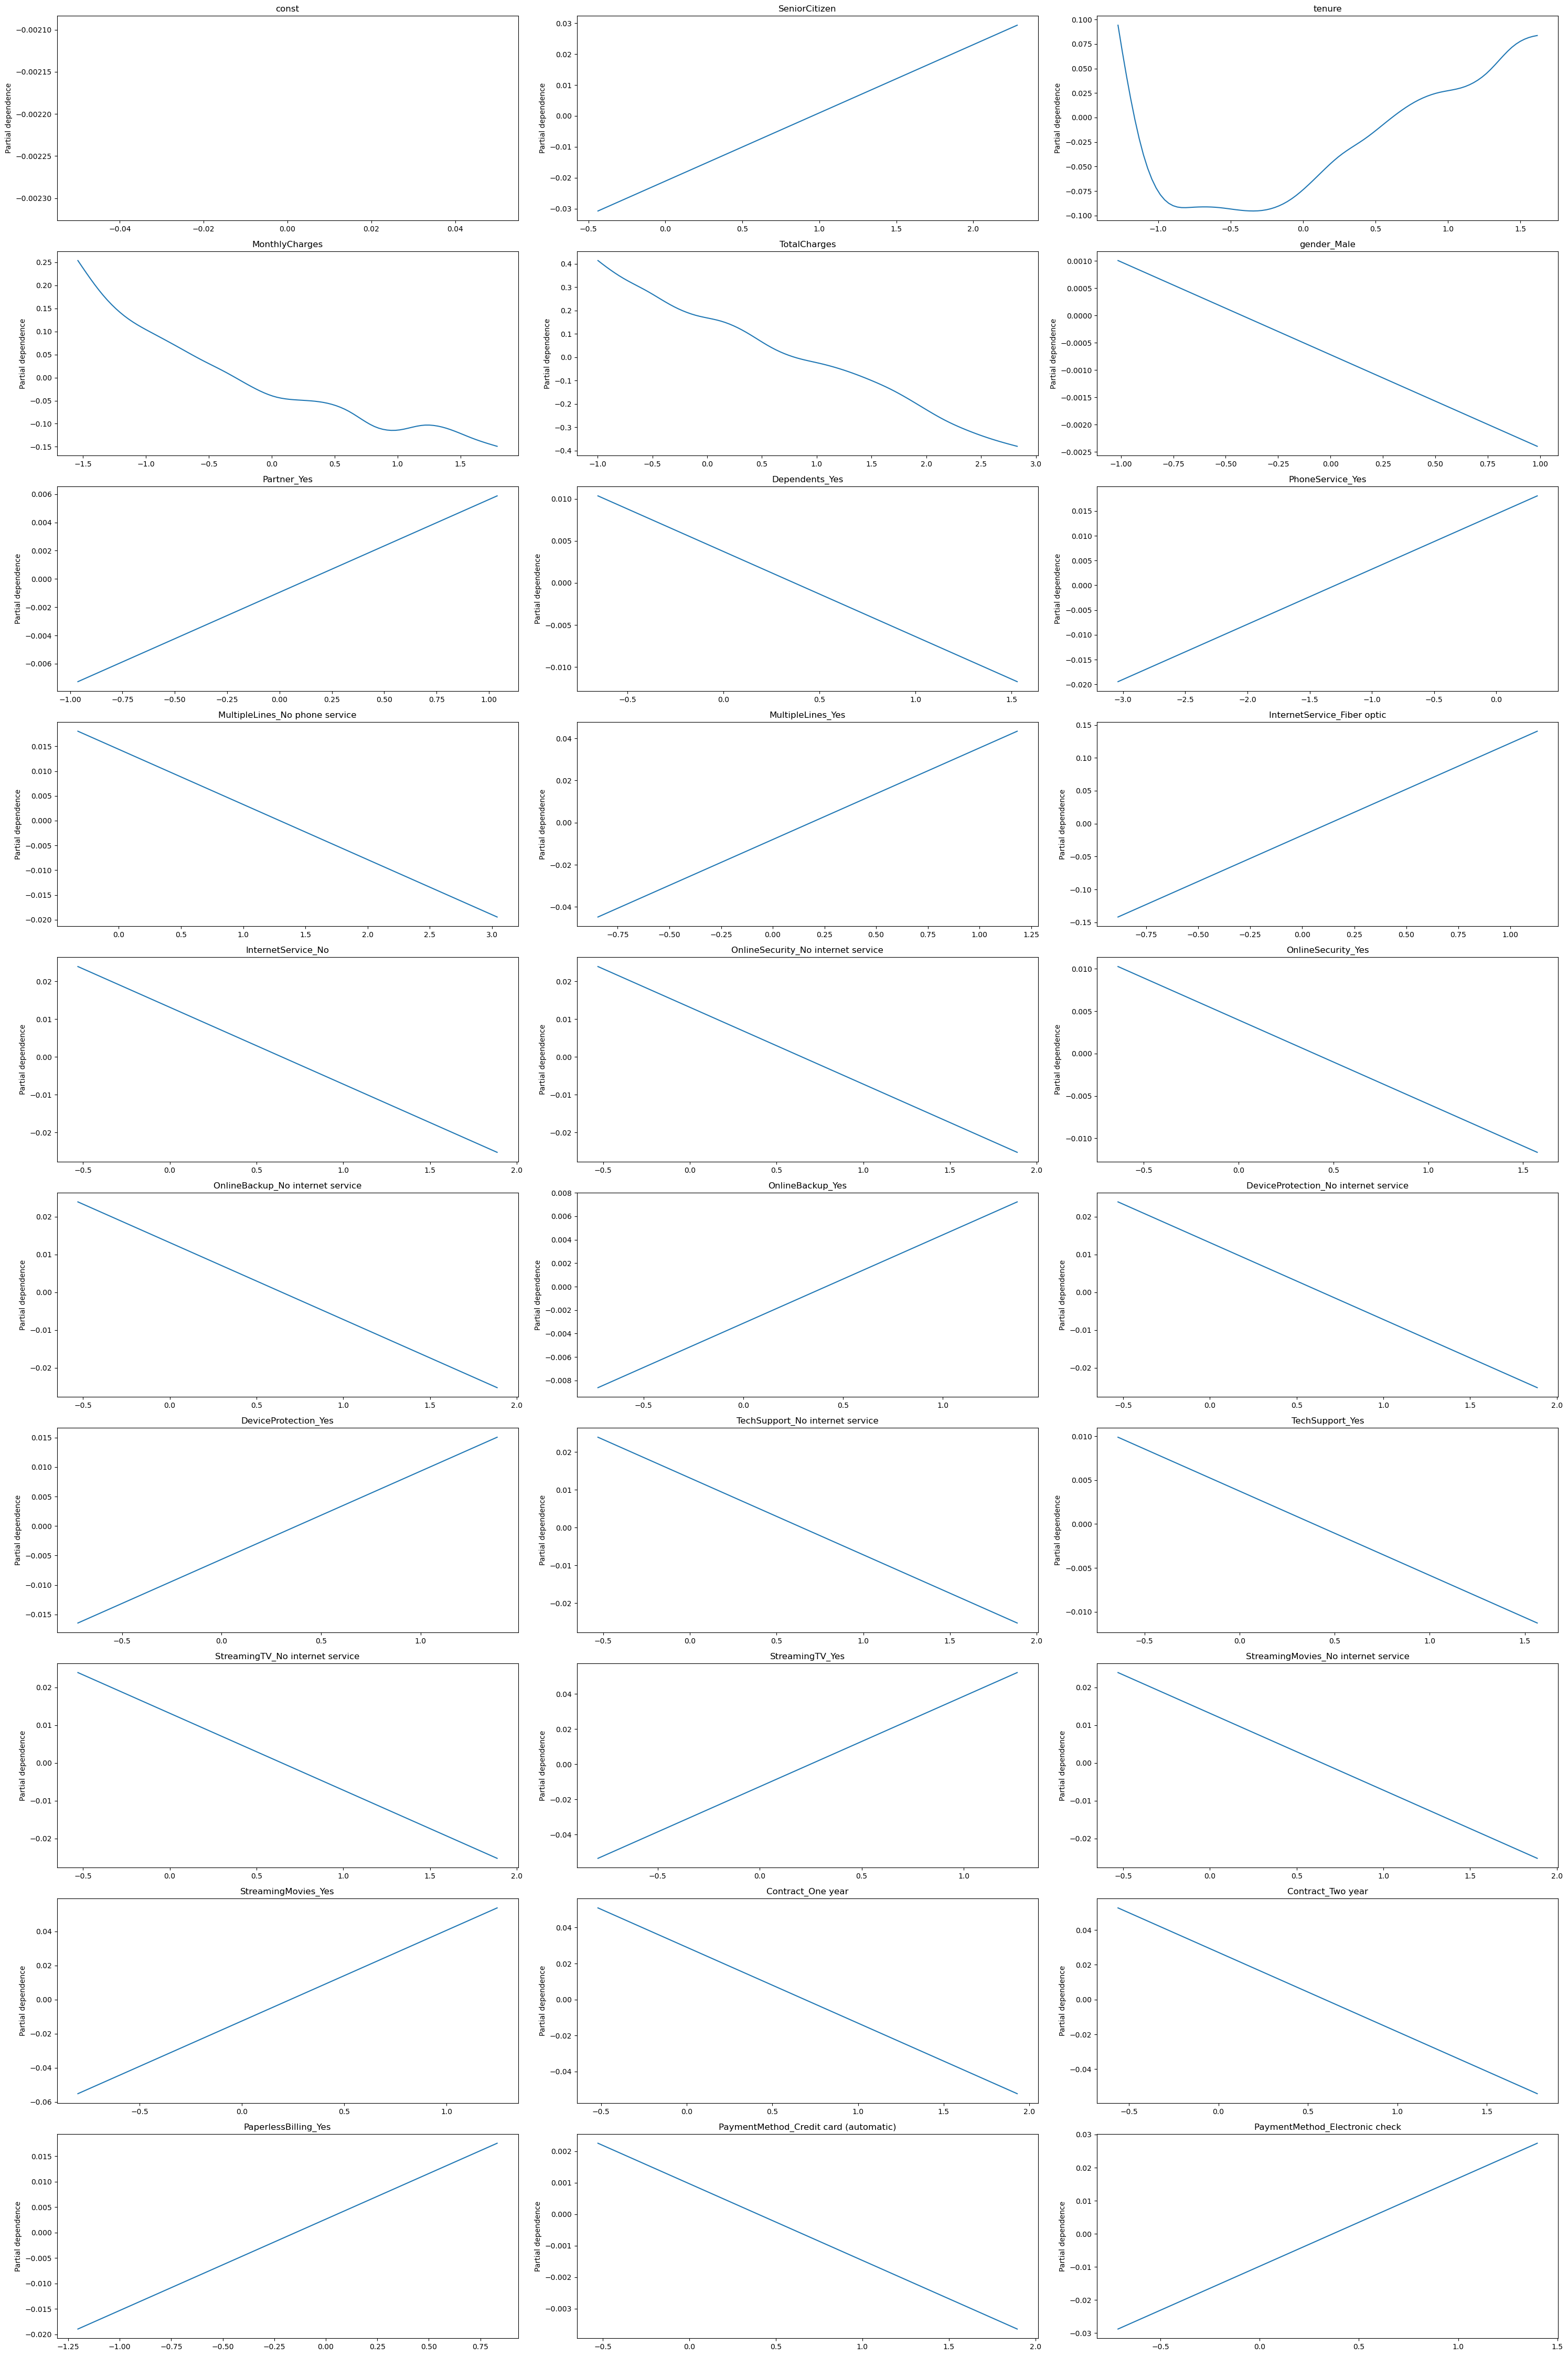

In [51]:
# Visualize GAM
plt.figure(figsize=(30, 45))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(10, 3, i + 1)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX))
    plt.title(X_train.columns[term.feature])
    plt.ylabel("Partial dependence")
plt.tight_layout()
plt.show()

Although we can observe the behavior of each variable in these graphs, they are truly useful only for continuous variables such as Tenure, Monthly Charges, and Total Charges. For the remaining binary variables, these graphs do not provide much additional interpretative value.

What we can discern is that as Tenure increases, the likelihood of churn also increases. On the other hand, for Total Charges, higher charges are associated with a lower probability of churn. This could indicate that users with higher charges are more engaged with and actively using the service.

## Model Comparison


**Linear Regression**:
- **Interpretability**: Low. The coefficients of the linear regression model in this case can not be directly interpreted as the change in the target variable for a one-unit change in the predictor variable, because we are treating the binary Churn variable as 1 or 0.
- **Strengths**: Simple and easy to interpret.
- **Weaknesses**: Can not represent the binary relationship that we are trying to predict of the Churn rate. Not as accurate because the real worl is not linear.

**Logistic Regression**:
- **Interpretability**: High. The coefficients of the logistic regression model can be directly interpreted as the log odds of the Churn. This makes it easy to understand the impact of each feature on the likelihood of churn.
- **Strengths**: Can give us the probabilities in this classification problem. Simple and easy to interpret.
- **Weaknesses**: Can only represent linear relationships. Not as accurate because the real world is not linear. Interpretation more dificcult than linear regression because the interpretation of the weights is multiplicative and not additive.

**Generalized Additive Model (GAM)**:
- **Interpretability**: High. GAMs allow for non-linear relationships between the features and the target variable while maintaining interpretability through partial dependence plots. The way predictions are produced is transparent. 
- **Strengths**: Can capture non-linear relationships, provides a balance between flexibility and interpretability.
- **Weaknesses**: More complex to fit and tune compared to logistic regression, most modifications of the linear model make the model less interpretable.


### Recommendation

In my opinion, the best model to use in this case is Logistic Regression, primarily because its coefficients are the easiest to interpret in relation to churn. While GAM has the advantage of capturing non-linear relationships, we do not have many continuous variables in this dataset to fully leverage its capabilities for better insights.

It is worth noting that when testing the assumptions of Logistic Regression, we do not always observe linearity. However, despite this limitation, Logistic Regression is still recommended because it is specifically designed for binary classification tasks like this one. Its simplicity and interpretability make it a practical and effective choice for understanding the relationship between customer features and churn.

